# Explanatory data analysis
Here we will explore our data, I would show how our data connected and how does it works.

In [1]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (20, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [2]:
#reading data
train = pd.read_csv('C:/Users/user/Projects/Health_Insurance_Sell_Analysis/data/train.csv')

In [3]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#rename columns for easier using
for column in train.columns:
    column_lower = column.lower()
    train = train.rename(columns = {column:column_lower})

In [5]:
train.columns

Index(['id', 'gender', 'age', 'driving_license', 'region_code',
       'previously_insured', 'vehicle_age', 'vehicle_damage', 'annual_premium',
       'policy_sales_channel', 'vintage', 'response'],
      dtype='object')

In [6]:
#so we have proportion 1/7, but it won't be a problem for us
train.response.value_counts()

0    334399
1     46710
Name: response, dtype: int64

In [7]:
#we don't have null values, so we don't have to manage with it
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int64  
 3   driving_license       381109 non-null  int64  
 4   region_code           381109 non-null  float64
 5   previously_insured    381109 non-null  int64  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   annual_premium        381109 non-null  float64
 9   policy_sales_channel  381109 non-null  float64
 10  vintage               381109 non-null  int64  
 11  response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [8]:
#it's important for us, but only one column - annual_premium, because as we can see 75% of all values under 40 000, 
#as we can understand, we have a lot of outliers
train.describe()

,id,age,driving_license,region_code,previously_insured,annual_premium,policy_sales_channel,vintage,response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## Features connection

In this part we will explore how our values distributed(hist) and how they connected(heatmap).

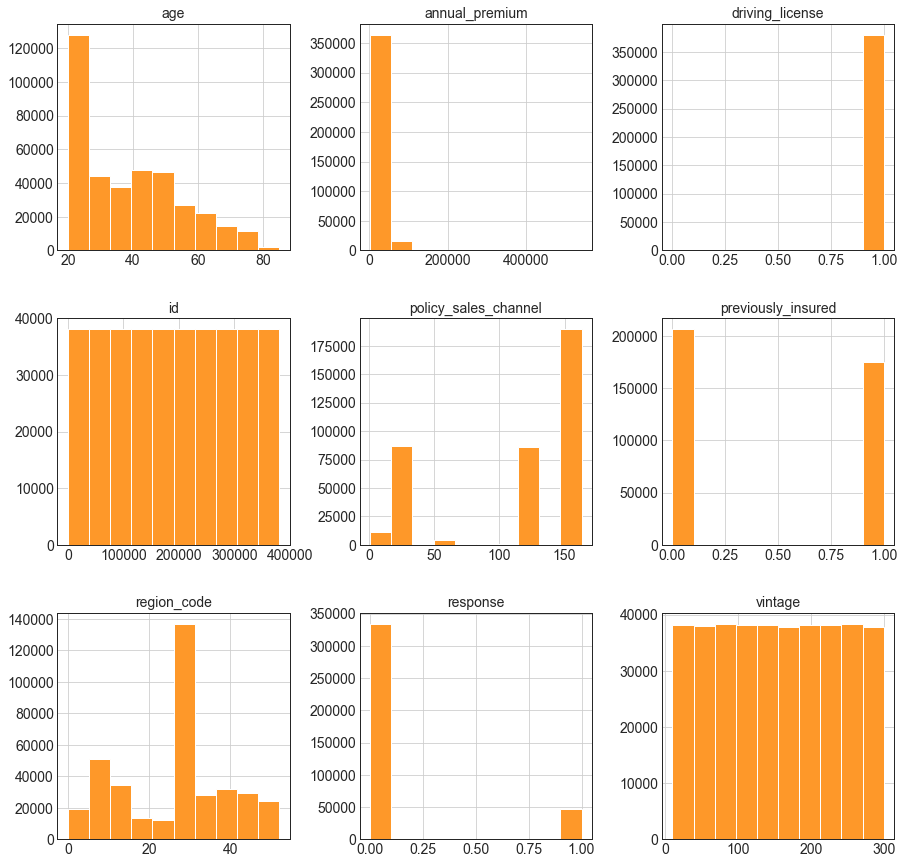

In [36]:
histograms_num = train.hist(figsize= (15, 15), color = sns.color_palette("YlOrBr", 1))
plt.show()

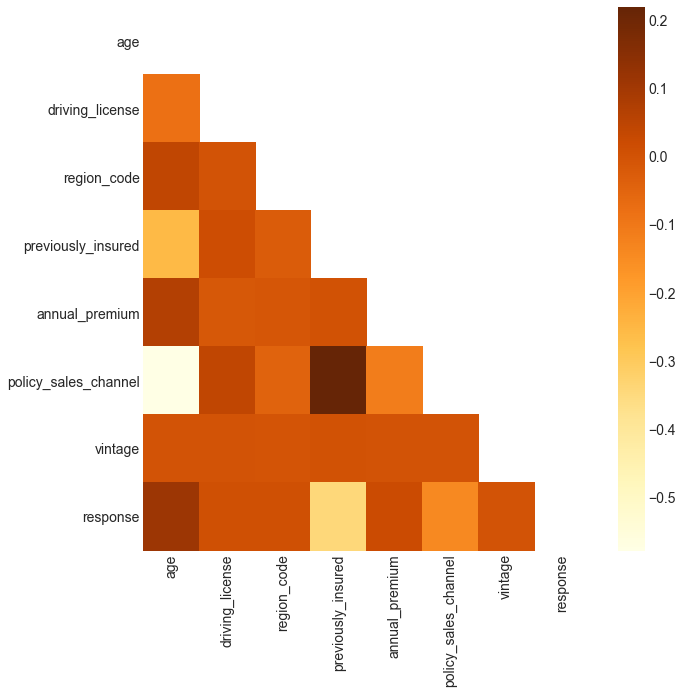

In [10]:
corr = train.drop(columns= 'id', axis = 1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(corr, mask=mask, cmap = 'YlOrBr')
    
#as we can see we don't have strong correlation between our features, but most of our features categorical, so in my opinion
#it won't be a big problem for us

## Separate Analysis
Here we will explore our data separately, from feature to feature.

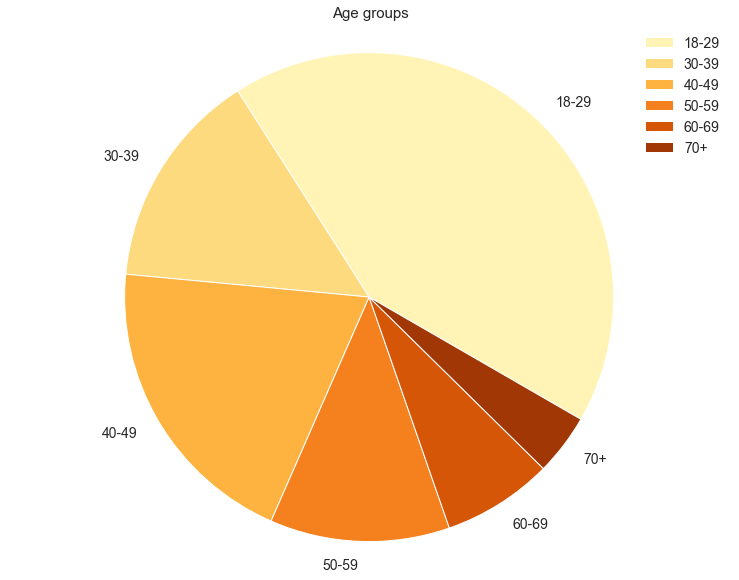

In [11]:
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
train['age_group'] = pd.cut(train.age, bins, labels = labels,include_lowest = True)

age_group = train.age_group.value_counts().to_frame()
age_group = age_group.rename(columns={'index':'age_group', 'age_group':'counts'})
age_group.reset_index()

labels = age_group.index.sort_values().tolist()
sizes = age_group.counts.sort_index().tolist()
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors =sns.color_palette(palette='YlOrBr'), startangle= -30)
ax1.axis('equal')
plt.legend(title='', loc='upper right', labels= labels)
ax1.set_title('Age groups', fontsize = 15)

plt.show()

#so this graph shows us how our age groups distributed, our as we can understand most of our data from people who under 50 years

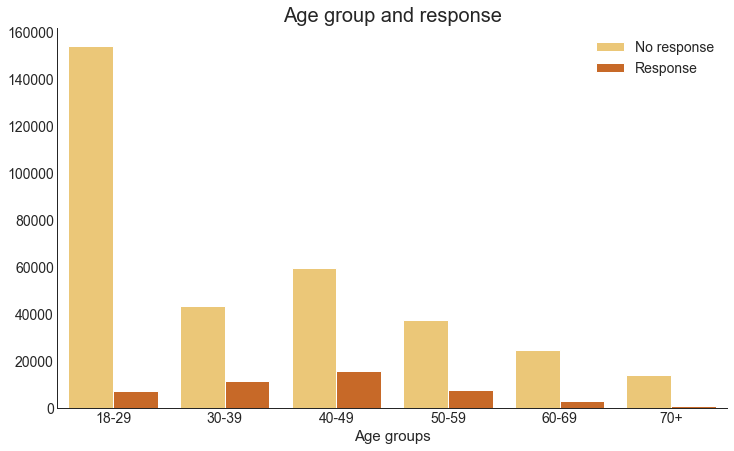

In [12]:
age_count_plot = plt.subplots(figsize=(12, 7))

age_count_plot = sns.countplot(
    x = 'age_group',
    data = train,
    hue = 'response',
    palette= 'YlOrBr',
)

sns.despine()
age_count_plot.set_xlabel('Age groups', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No response', 'Response'])
age_count_plot.set_ylabel('')
age_count_plot.set_title('Age group and response', fontsize = 20)
plt.show()

#this is more informative, we have more sales in middle age group, clients from 18-29 buying less insurance, than other groups
#so we should focus on age groups from 30 to 59

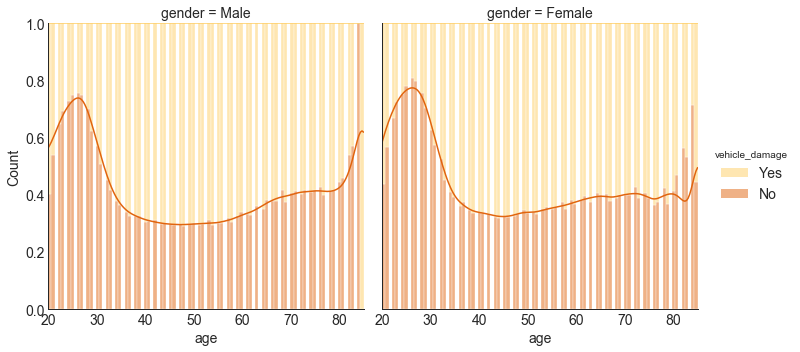

In [13]:
ax = sns.displot(
    x = 'age',
    data = train,
    palette= 'YlOrBr',
    kde=True,
    col="gender",
    multiple = 'fill',
    hue = 'vehicle_damage',
)

plt.show()

#it's very intesting, how people getting their vehicle damage depends on their age and gender

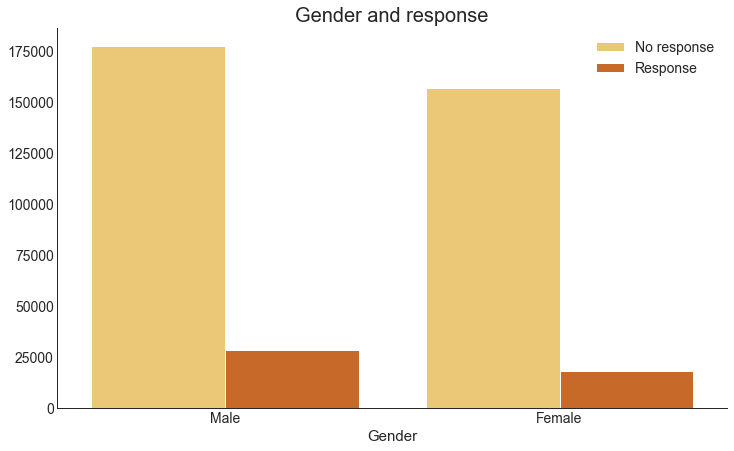

In [42]:
gender = plt.subplots(figsize=(12, 7))
gender = sns.countplot(
    x = 'gender',
    hue = 'response',
    data = train,
    palette='YlOrBr'
)

sns.despine()
gender.set_xlabel('Gender', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No response', 'Response'])
gender.set_ylabel('')
gender.set_title('Gender and response', fontsize = 20)
plt.show()

#This is interesting, female clients getting insurance more than male clients

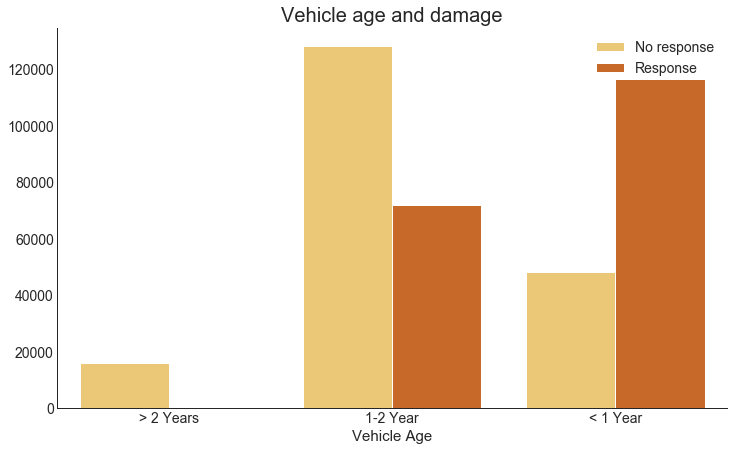

In [43]:
vehicle_age_damage = plt.subplots(figsize=(12, 7))

vehicle_age_damage = sns.countplot(
    x = 'vehicle_age',
    hue = 'vehicle_damage',
    data = train,
    palette= 'YlOrBr'
)

sns.despine()
vehicle_age_damage.set_xlabel('Vehicle Age', fontsize = 15)
plt.legend(title='', loc='upper right', labels=['No response', 'Response'])
vehicle_age_damage.set_ylabel('')
vehicle_age_damage.set_title('Vehicle age and damage', fontsize = 20)
plt.show()

#from this graph we understand, that every vehicles older than 2 years have a damage 

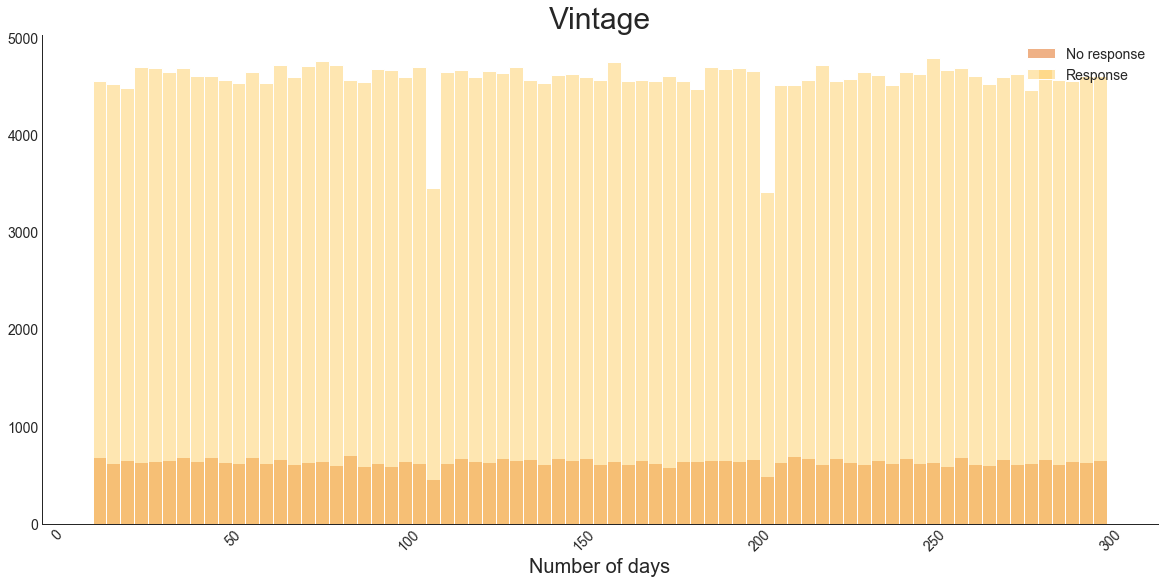

In [44]:
vintage = plt.subplots(figsize=(20, 9))
vintage = sns.histplot(
    x = 'vintage',
    hue = 'response',
    data = train,
    palette= 'YlOrBr'
)

sns.despine()

vintage.set_xlabel('Number of days', fontsize = 20)
vintage.set_ylabel('')
vintage.set_title('Vintage', fontsize = 30)

plt.xticks(rotation=45)
plt.legend(title='', loc='upper right', labels=['No response', 'Response'])

plt.show()

#from this graph we can get that people drop their insurance on 100 or 200 day, other distribution is normal

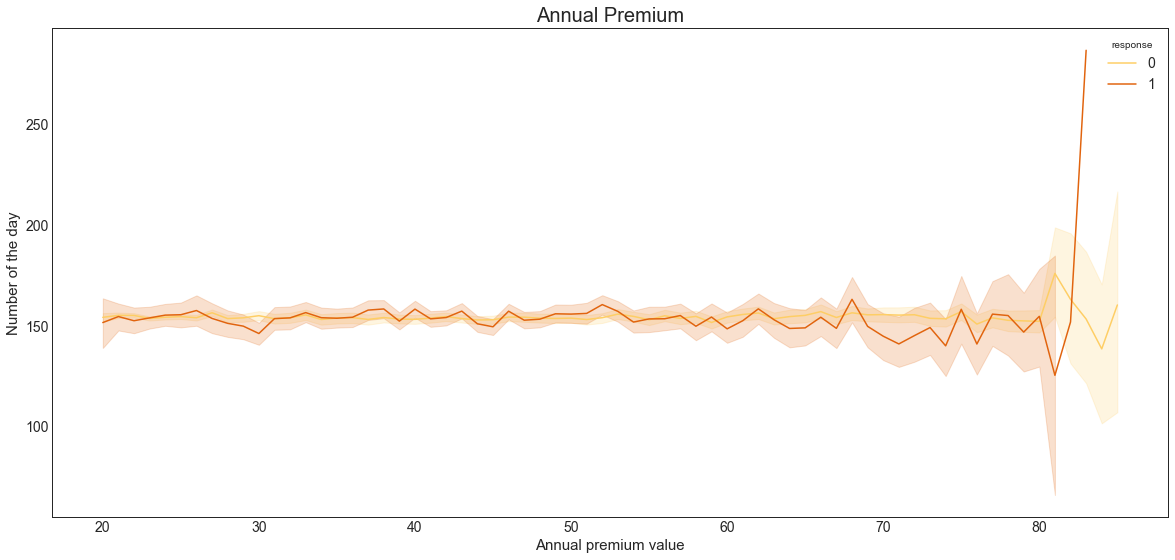

In [45]:
vintage_age = plt.subplots(figsize=(20, 9))
vintage_age = sns.lineplot(
    x = 'age',
    y = 'vintage',
    data = train,
    hue = 'response',
    palette= "YlOrBr"
)

vintage_age.set_xlabel('Annual premium value', fontsize = 15)
vintage_age.set_ylabel('Number of the day', fontsize = 15)
vintage_age.set_title('Annual Premium', fontsize = 20)
plt.show()

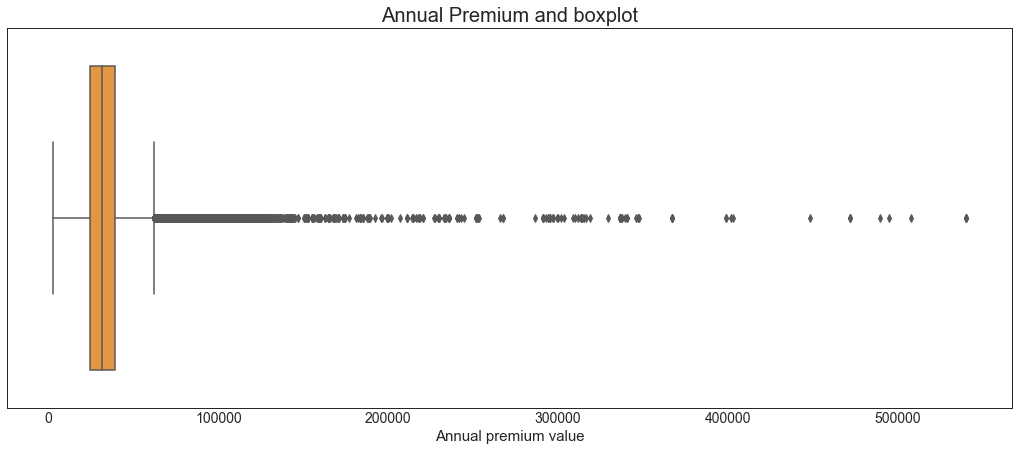

In [40]:
annual = plt.subplots(figsize=(18, 7))
annual = sns.boxplot(
    x = 'annual_premium',
    data = train,
    palette  = "YlOrBr"
)

annual.set_xlabel('Annual premium value', fontsize = 15)
annual.set_ylabel('')
annual.set_title('Annual Premium and boxplot', fontsize = 20)
plt.show()
#as we can see, there are a lot of outliers and we should limit them, if we will calculate, about 98% in range from 0 to 80000

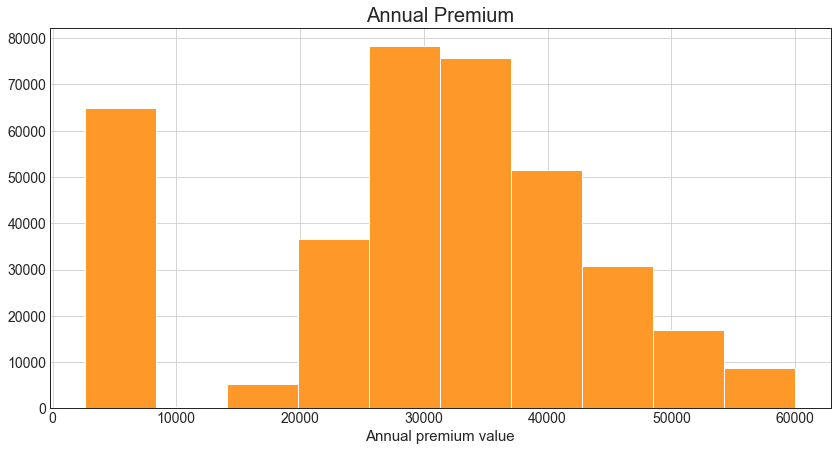

In [39]:
annual_6 = plt.subplots(figsize=(14, 7))

annual_6 = train[train.annual_premium <= 60000].annual_premium.hist(color = sns.color_palette("YlOrBr", 1))

annual_6.set_xlabel('Annual premium value', fontsize = 15)
annual_6.set_ylabel('')
annual_6.set_title('Annual Premium', fontsize = 20)
plt.show()
#here we can see two groups: people, who paid for their insurance above 20 000 and up to 10 000